# Laboratorio de evaluación de modelos de aprendizaje supervisado

Realice los siguientes ejercicios para consolidar sus conocimientos y comprensión de la evaluación de modelos de aprendizaje supervisado.

In [21]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [22]:
seed = 1

In [23]:
# Cargar dataset
from sklearn.datasets import fetch_openml

# Cargar el conjunto de datos de Boston desde fetch_openml
boston = fetch_openml(data_id=531)
X, y = boston.data, boston.target
features = boston.feature_names

print('Nombres de las características: {}'.format(features))
print('Forma de los datos: {} {}'.format(X.shape, y.shape))

Nombres de las características: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Forma de los datos: (506, 13) (506,)


## Evaluación de modelos de regresión

## 1. Divida este conjunto de datos en conjuntos de train (80%) y de test (20%).

El campo `MEDV` representa el valor medio de las viviendas ocupadas por sus propietarios (en miles de dólares) y es la variable objetivo que queremos predecir.

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

In [25]:
# Aseguramos que X es un array NumPy y todos los datos son numéricos
X = np.array(X, dtype=np.float64)
y = np.array(y, dtype=np.float64)

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Tamaños de entrenamiento y prueba de X: {} {}'.format(X_train.shape, X_test.shape))
print('Tamaños de entrenamiento y prueba de y: {} {}'.format(y_train.shape, y_test.shape))

Tamaños de entrenamiento y prueba de X: (404, 13) (102, 13)
Tamaños de entrenamiento y prueba de y: (404,) (102,)


## 2. Entrene un modelo `LinearRegression` en este conjunto de datos y genere predicciones tanto en el conjunto de entrenamiento como en el de prueba.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
#Definimos el modelo
lr = LinearRegression() 

#Entrenamos el modelo
lr.fit(X_train, y_train)

# Coeficientes de regresión
coefs_lr = pd.Series(np.abs(lr.coef_), index=features).sort_values()

# Predicción
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

## 3. Calcule e imprima R-cuadrado tanto para el conjunto de entrenamiento como para el de prueba.

In [35]:
r2score_train = lr.score(X_train, y_train)
r2score_test = lr.score(X_test, y_test)

print('Puntaje R^2 (entrenamiento): {}'.format(r2score_train))
print('Puntaje R^2 (prueba): {}'.format(r2score_test))

Puntaje R^2 (entrenamiento): 0.7552303104916094
Puntaje R^2 (prueba): 0.677959511507512


## 4. Calcule e imprima el error cuadrático medio para el conjunto de entrenamiento y de prueba.

In [38]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print('Puntaje MSE (entrenamiento): {}'.format(mse_train))
print('Puntaje MSE (prueba): {}'.format(mse_test))

Puntaje MSE (entrenamiento): 20.04927272603825
Puntaje MSE (prueba): 29.76466705645206


## 5. Calcule e imprima el error medio absoluto para el conjunto de entrenamiento y de prueba.

In [37]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print('Puntaje MAE (entrenamiento): {}'.format(mae_train))
print('Puntaje MAE (prueba): {}'.format(mae_test))

Puntaje MAE (entrenamiento): 3.1524796161155946
Puntaje MAE (prueba): 3.701595548909438


## Evaluación del modelo de clasificación

In [41]:
from sklearn.datasets import load_iris

data = load_iris()

X_c = pd.DataFrame(data["data"], columns=data["feature_names"])
y_c = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X_c, y_c], axis=1)

In [44]:
data['class'].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

## 6. Divida este conjunto de datos en conjuntos de train (80%) y de test (20%).

El campo `class` representa el tipo de flor y es la variable objetivo que querremos predecir.

In [ ]:
#! pip install plotly

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(8,8))
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(6,6)});

<Figure size 800x800 with 0 Axes>

In [49]:
# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.2)

## 7. Entrene un modelo `LogisticRegression` en este conjunto de datos y genere predicciones tanto en el conjunto de entrenamiento como en el de prueba.

In [50]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000,random_state=42)


In [53]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [54]:
y_pred_test = logistic_model.predict(X_test)

In [55]:
y_pred_train= logistic_model.predict(X_train)

## 8. Calcule e imprima la puntuación de precisión tanto para el conjunto de entrenamiento como para el de pruebas.

    Esta función resuelve los ejercicios 8,9,10,11,12 y 13.

#### ANÁLISIS PARA CONJUNTO DE DATOS DE TEST

In [58]:
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Precisión del modelo: {accuracy}")

# Imprimir un informe de clasificación detallado
print("Informe de clasificación:")
print(classification_report(y_test, y_pred_test))

Precisión del modelo: 0.9
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      0.75      0.80         8
           2       0.78      0.88      0.82         8

    accuracy                           0.90        30
   macro avg       0.88      0.88      0.87        30
weighted avg       0.90      0.90      0.90        30



#### ANÁLISIS PARA CONJUNTO DE DATOS DE PRUEBA

In [59]:
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Precisión del modelo: {accuracy}")

# Imprimir un informe de clasificación detallado
print("Informe de clasificación:")
print(classification_report(y_train, y_pred_train))

Precisión del modelo: 0.9916666666666667
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.98      0.99        42
           2       0.98      1.00      0.99        42

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



## 9. Calcule e imprima la puntuación de precisión equilibrada tanto para el conjunto de entrenamiento como para el de pruebas.

In [ ]:
# Your code here

## 10. Calcule e imprima la puntuación de precisión tanto para el conjunto de entrenamiento como para el de prueba.

In [ ]:
# Your code here

## 11. Calcule e imprima la puntuación de recuerdo tanto para el conjunto de entrenamiento como para el de prueba.

In [ ]:
# Your code here

## 12. Calcule e imprima la puntuación F1 tanto para el conjunto de entrenamiento como para el de prueba.

In [ ]:
# Your code here

## 13. Generar matrices de confusión tanto para el conjunto de entrenamiento como para el de pruebas.

In [61]:
def plot_confusion_matrix(y_pred, y):
    plt.imshow(confusion_matrix(y, y_pred), interpolation='nearest', cmap='grey')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9, 9)

[[36  0  0]
 [ 0 41  1]
 [ 0  0 42]]


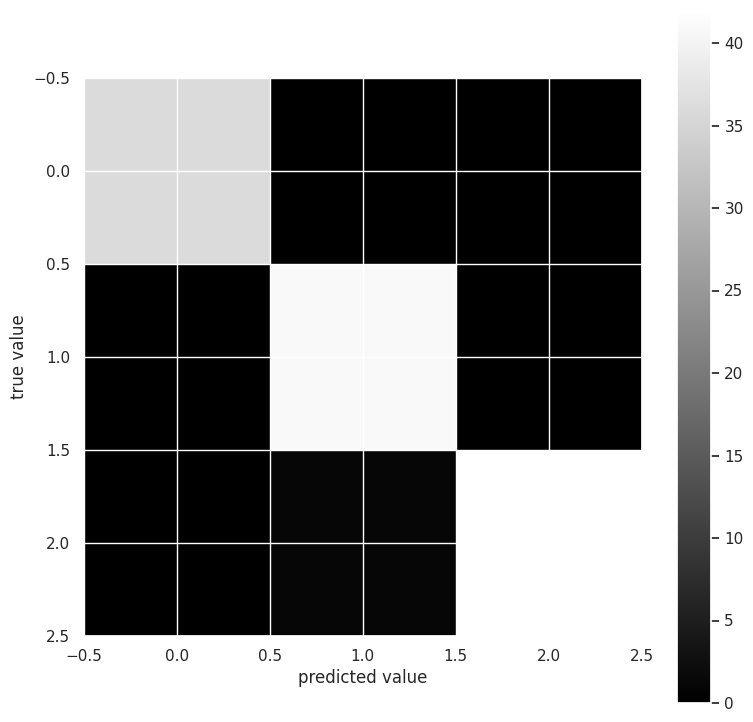

In [62]:
# Matriz de confusión para TRAIN
plot_confusion_matrix(y_train, y_pred_train)
print(confusion_matrix(y_train, y_pred_train))

[[14  0  0]
 [ 0  6  2]
 [ 0  1  7]]


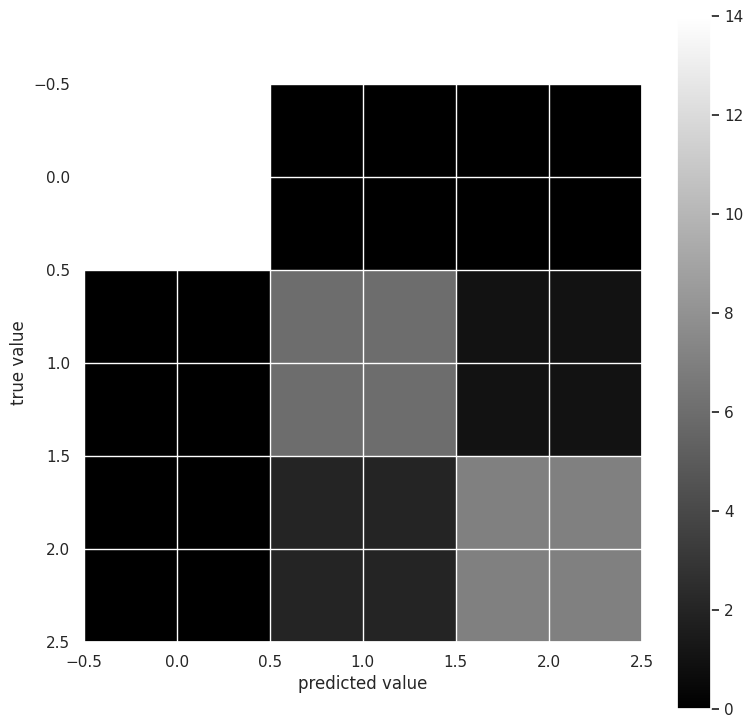

In [63]:
# Matriz de confusión para TEST
plot_confusion_matrix(y_test, y_pred_test)
print(confusion_matrix(y_test, y_pred_test))

## Bonus: Para cada uno de los conjuntos de datos de este laboratorio, intente entrenar con algunos de los otros modelos que ha aprendido, vuelva a calcular las métricas de evaluación y compare para determinar qué modelos funcionan mejor en cada conjunto de datos.

In [ ]:
# Your code here